###SUPPLY CHAIN OPTIMIZATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/supply_chain_data.csv")

In [ ]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


DATA CLEANING

In [ ]:
df.shape

(100, 24)

In [ ]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


EXPLORATORY DATA ANALYSIS

In [ ]:
num_col=[]
cat_col=[]

In [ ]:
for column in df.columns:
  if df[column].dtype=='O':
    cat_col.append(column)
  else:
    num_col.append(column)

In [ ]:
cat_col

['Product type',
 'SKU',
 'Customer demographics',
 'Shipping carriers',
 'Supplier name',
 'Location',
 'Inspection results',
 'Transportation modes',
 'Routes']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_col:
    df[col] = encoder.fit_transform(df[col])


In [ ]:
num_col

['Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping costs',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Defect rates',
 'Costs']

In [ ]:
df.shape

(100, 24)

In [ ]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,1,0,69.808006,55,802,8661.996792,2,58,7,96,...,4,29,215,29,46.279879,2,0.226410,2,1,187.752075
1,2,1,14.843523,95,736,7460.900065,0,53,30,37,...,4,23,517,30,33.616769,2,4.854068,2,1,503.065579
2,1,12,11.319683,34,8,9577.749626,3,1,10,88,...,4,12,971,27,30.688019,2,4.580593,0,2,141.920282
3,2,23,61.163343,68,83,7766.836426,2,23,13,59,...,3,24,937,18,35.624741,0,4.746649,1,0,254.776159
4,2,34,4.805496,26,871,2686.505152,2,5,3,56,...,2,5,414,3,92.065161,0,3.145580,0,0,923.440632


<Axes: xlabel='Product type', ylabel='Number of products sold'>

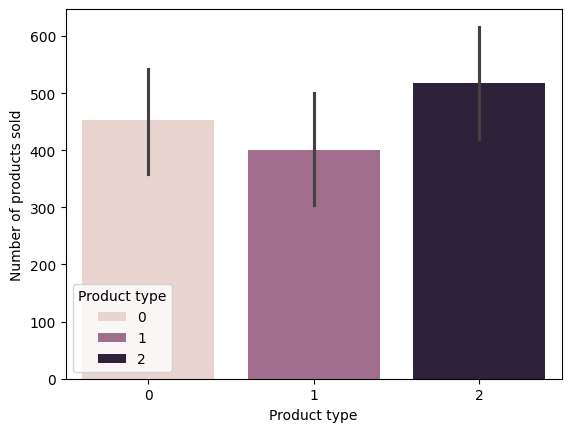

In [ ]:
sns.barplot(y=df['Number of products sold'], x=df['Product type'],hue=df["Product type"])

<Axes: xlabel='Product type', ylabel='Revenue generated'>

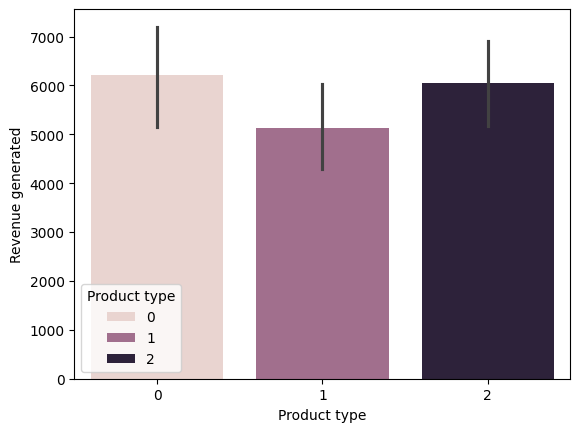

In [ ]:
sns.barplot(y=df['Revenue generated'], x=df['Product type'],hue=df["Product type"])

<Axes: xlabel='Location', ylabel='Number of products sold'>

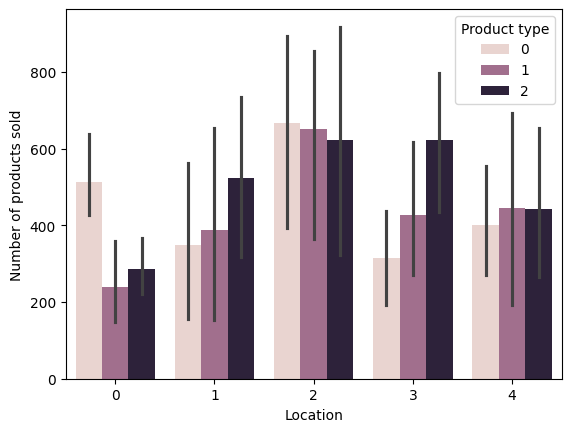

In [ ]:
sns.barplot(y=df['Number of products sold'], x=df['Location'], hue=df['Product type'])

<Axes: xlabel='Product type', ylabel='Number of products sold'>

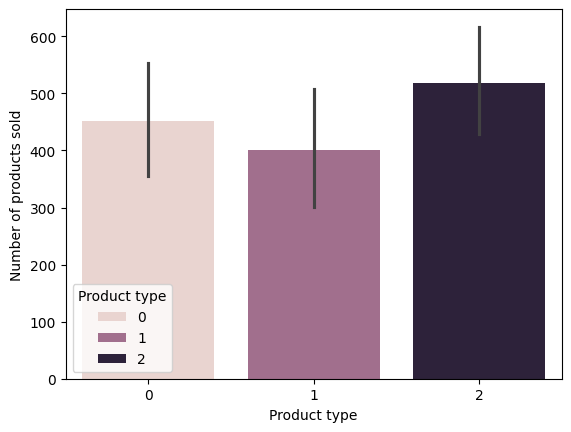

In [ ]:
sns.barplot(y=df['Number of products sold'], x=df['Product type'], hue=df["Product type"])

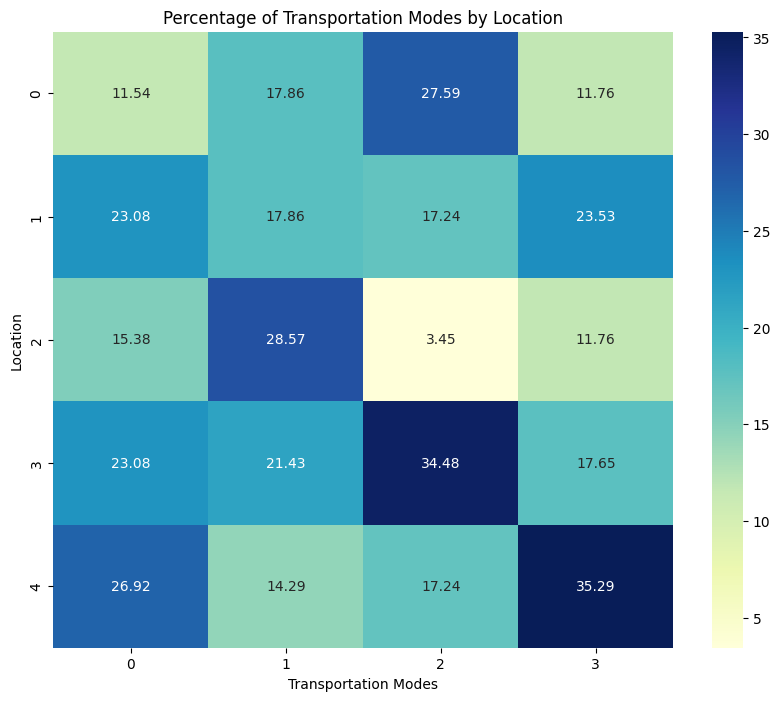

In [ ]:
cross_tab = pd.crosstab(df['Location'], df['Transportation modes'], normalize='columns') * 100

# Create the heatmap with values inside the boxes
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Percentage of Transportation Modes by Location')
plt.xlabel('Transportation Modes')
plt.ylabel('Location')
plt.show()

In [ ]:
x=df.drop(columns=['Revenue generated'])
y=df['Revenue generated']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN

In [ ]:
model=Sequential()
model.add(SimpleRNN(10,input_shape=(100,23)))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                340       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(model.get_weights()[0].shape)
model.get_weights()[0]

(23, 10)


array([[-0.15971449, -0.4257703 ,  0.12959278, -0.19241287,  0.3140272 ,
         0.14615297,  0.14657438, -0.10232627, -0.25787914, -0.16227576],
       [-0.24660899, -0.00657853, -0.04839671,  0.31962574, -0.28350276,
         0.08068985,  0.08531028, -0.04754266, -0.221916  , -0.0264422 ],
       [ 0.00370488, -0.04639724, -0.20231496,  0.00100675,  0.00138769,
         0.2889701 ,  0.23579025, -0.22326994, -0.38885573, -0.07885477],
       [-0.19852763, -0.1632266 , -0.33021095,  0.15168971, -0.2781772 ,
        -0.34398758, -0.20595008, -0.13761216,  0.36706102,  0.34425282],
       [ 0.35305882,  0.3238566 ,  0.14576018,  0.02454102, -0.00473836,
        -0.15402192,  0.36498332,  0.1721068 ,  0.02404541,  0.05242893],
       [ 0.3371991 ,  0.36875528, -0.23115017, -0.279889  ,  0.22271079,
         0.1085965 , -0.3846579 , -0.33252266, -0.40054005, -0.12353644],
       [-0.38009438,  0.21051013, -0.15973097, -0.41410297, -0.19645749,
        -0.20506868,  0.11431336,  0.08487338

In [ ]:
print(model.get_weights()[1].shape)
model.get_weights()[1]

(10, 10)


array([[ 0.03604794, -0.00697062,  0.44520524, -0.6480849 , -0.46944365,
         0.07057923,  0.17614809,  0.11508032,  0.02775116, -0.33170718],
       [-0.1376456 ,  0.22413309,  0.08479694,  0.435323  , -0.03902361,
         0.11390124,  0.52258927, -0.04744231,  0.55477756, -0.36945462],
       [-0.44110256,  0.32787427, -0.00178531, -0.11308286,  0.17007007,
        -0.5736119 ,  0.3362422 , -0.14940351, -0.4244737 , -0.1078116 ],
       [ 0.18119255, -0.05664042, -0.3961379 ,  0.03300026,  0.16522503,
         0.31232604,  0.10225741,  0.2641534 , -0.4459685 , -0.63401794],
       [ 0.11532965,  0.1020433 , -0.19230872, -0.16386436,  0.01550133,
         0.20362468,  0.6156416 ,  0.41697514, -0.06680024,  0.5598247 ],
       [ 0.01028397,  0.623824  ,  0.05550123, -0.14386863,  0.10035005,
         0.5610975 , -0.09496084, -0.4734364 , -0.14134237,  0.09445421],
       [-0.16598737,  0.2450875 ,  0.5076733 ,  0.05558625,  0.47418824,
         0.08140123, -0.25069958,  0.5965483 

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_array = x_train.values
x_test_array = x_test.values

In [ ]:

x_train_rnn = x_train_array.reshape((x_train_array.shape[0], 1, x_train_array.shape[1]))
x_test_rnn = x_test_array.reshape((x_test_array.shape[0], 1, x_test_array.shape[1]))

In [ ]:
def train_model(model_type):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(10, input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
    elif model_type == 'RNN':
        model.add(SimpleRNN(10, input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
    elif model_type == 'GRU':
        model.add(GRU(10, input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2])))
    else:
        raise ValueError("Invalid model type. Choose either 'LSTM', 'RNN', or 'GRU'.")
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(x_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_rnn, y_test), verbose=0)
    val_r2_score = r2_score(y_test, model.predict(x_test_rnn))
    mse = mean_squared_error(y_test, model.predict(x_test_rnn))
    print(f"MSE of {model_type}: {mse}")
    return mse

1/1 [==============================] - 0s 23ms/step
MSE of LSTM: 39312003.22354709
1/1 [==============================] - 0s 24ms/step
MSE of RNN: 39286778.123854734
1/1 [==============================] - 0s 23ms/step
MSE of GRU: 39302861.950166136


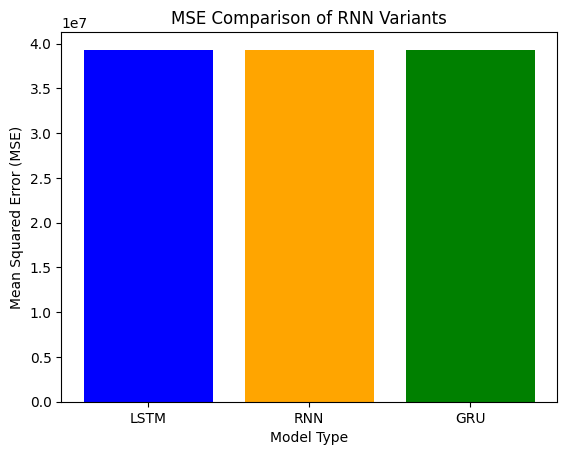

In [ ]:
model_types = ['LSTM', 'RNN', 'GRU']
mses = []
for model_type in model_types:
    mses.append(train_model(model_type))

plt.bar(model_types, mses)
plt.xlabel('Model Type')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison of RNN Variants')
plt.show()